Task-1: Download and explore the DDD dataset

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf

# Set seeds for reproducibility
os.environ['PYTHONHASHSEED'] = '42'
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanvithgulla","key":"c0ce27c82260de5be7c3ca57b7665a63"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle


In [ ]:
!kaggle datasets list -s drowsiness


ref                                                          title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
prasadvpatil/mrl-dataset                                     Drowsiness Detection Dataset                           23685003  2020-12-22 08:20:39.753000           9051         86  0.875            
hazemfahmy/openned-closed-eyes                               Drowsiness Detection Dataset                          551803258  2023-07-20 13:09:08.037000           2582         50  1.0              
kutaykutlu/drowsiness-detection                              Drowsiness Detection                                  188465583  2021-02-14 19:06:50.363000           2656         39  0.5625           
ismailnasr

In [ ]:
!kaggle datasets download -d ismailnasri20/driver-drowsiness-dataset-ddd


Dataset URL: https://www.kaggle.com/datasets/ismailnasri20/driver-drowsiness-dataset-ddd
License(s): unknown
 99% 2.55G/2.58G [00:05<00:00, 544MB/s]
100% 2.58G/2.58G [00:10<00:00, 255MB/s]


In [ ]:
!unzip driver-drowsiness-dataset-ddd.zip -d ddd_dataset


Streaming output truncated to the last 5000 lines.
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0082.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0083.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0084.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0085.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0086.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0087.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0088.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0089.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0090.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0091.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y0092.png  
  inflating: ddd_dataset/Driver Drowsiness Dataset (DDD)/Non Drowsy/y

In [ ]:
!ls ddd_dataset


'Driver Drowsiness Dataset (DDD)'


In [ ]:
import os

def count_images(folder):
    total = 0
    for path, dirs, files in os.walk(folder):
        total += len([file for file in files if file.endswith('.jpg') or file.endswith('.png')])
    return total

print("Total Images:", count_images("ddd_dataset"))


Total Images: 41793


In [ ]:
!apt install tree
!tree ddd_dataset -d


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (53.9 kB/s)
Selecting previously unselected package tree.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
ddd_dataset
└── Driver Drowsiness Dataset (DDD)
    ├── Drowsy
    └── Non Drowsy

3 directories


In [ ]:
import os

drowsy_path = "ddd_dataset/Driver Drowsiness Dataset (DDD)/Drowsy"
print(os.listdir(drowsy_path))


['C0230.png', 'A1080.png', 'O0366.png', 'ZC0769.png', 'ZC1004.png', 'ZB1116.png', 'N0131.png', 'O1262.png', 'K0245.png', 'ZB1138.png', 'ZC0963.png', 'G0530.png', 'X1425.png', 'T0264.png', 'X1633.png', 'W0665.png', 'A0040.png', 'Q0507.png', 'J0230.png', 'W0087.png', 'E0511.png', 'U0050.png', 'Q0161.png', 'L0169.png', 'C0123.png', 'I0059.png', 'P0683.png', 'M0494.png', 'G0045.png', 'M0740.png', 'A0842.png', 'X1080.png', 'M0275.png', 'U0123.png', 'E1039.png', 'A0928.png', 'H0323.png', 'ZB0035.png', 'Q0523.png', 'V0645.png', 'O0485.png', 'V0540.png', 'G0005.png', 'Q0427.png', 'N0698.png', 'A1361.png', 'N1023.png', 'M0631.png', 'J0408.png', 'T0165.png', 'V0198.png', 'I0893.png', 'ZB0237.png', 'I0506.png', 'V0410.png', 'J0213.png', 'O1276.png', 'I0828.png', 'E0392.png', 'I1161.png', 'H0230.png', 'O0078.png', 'E0749.png', 'ZC0427.png', 'A0751.png', 'O0707.png', 'I0114.png', 'X0548.png', 'K0132.png', 'N0132.png', 'A1020.png', 'N0292.png', 'W0170.png', 'E0467.png', 'A0493.png', 'A0767.png', 'V0

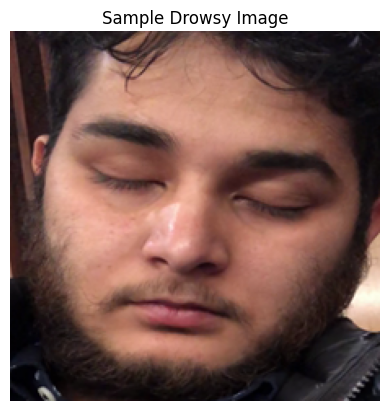

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = "ddd_dataset/Driver Drowsiness Dataset (DDD)/Drowsy/P0650.png"
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title("Sample Drowsy Image")
plt.axis('off')
plt.show()


In [ ]:
import os
print("Classes:", os.listdir("ddd_dataset"))


Classes: ['Driver Drowsiness Dataset (DDD)']


Task-2: Preprocess dataset: resize, normalize, augment images

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
img_size = (224, 224)
batch_size = 32

data_dir = '/content/ddd_dataset'
train_dir = os.path.join(data_dir, 'Driver Drowsiness Dataset (DDD)/Drowsy')
val_dir = os.path.join(data_dir, 'Driver Drowsiness Dataset (DDD)/Non Drowsy')


In [ ]:
print("Drowsy:", len(os.listdir(train_dir)))
print("Non Drowsy:", len(os.listdir(val_dir)))


Drowsy: 22348
Non Drowsy: 19445


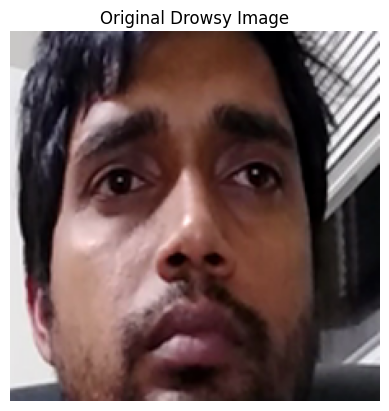

In [ ]:
sample_img_path = os.path.join(train_dir, os.listdir(train_dir)[0])
img = tf.keras.preprocessing.image.load_img(sample_img_path)
plt.imshow(img)
plt.title("Original Drowsy Image")
plt.axis('off')
plt.show()


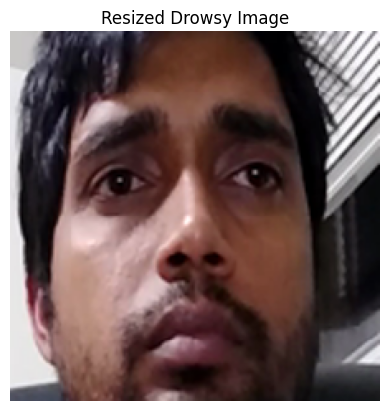

In [ ]:
img_array = tf.keras.preprocessing.image.load_img(sample_img_path, target_size=img_size)
plt.imshow(img_array)
plt.title("Resized Drowsy Image")
plt.axis('off')
plt.show()


In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
train_gen = datagen.flow_from_directory(
    data_dir + '/Driver Drowsiness Dataset (DDD)',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 41793 images belonging to 2 classes.


In [ ]:
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)


In [ ]:
train_aug_gen = augmented_datagen.flow_from_directory(
    data_dir + '/Driver Drowsiness Dataset (DDD)',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 41793 images belonging to 2 classes.


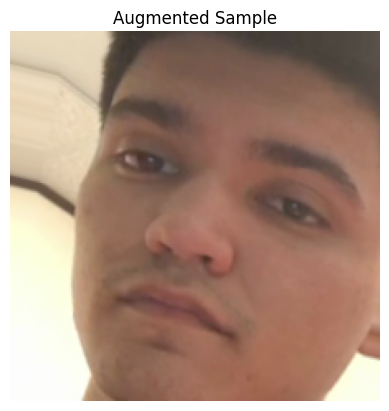

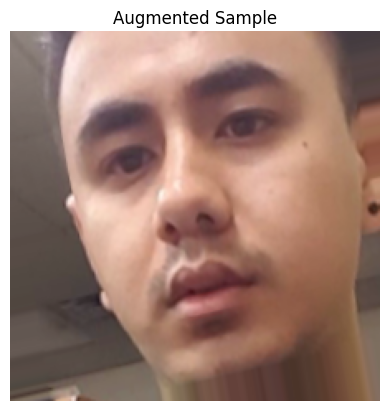

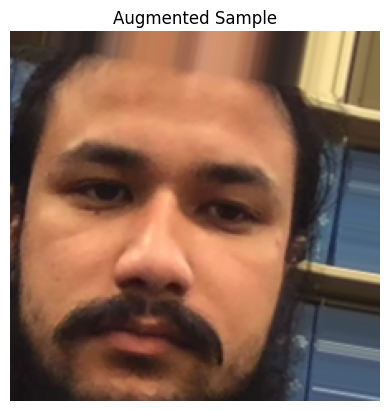

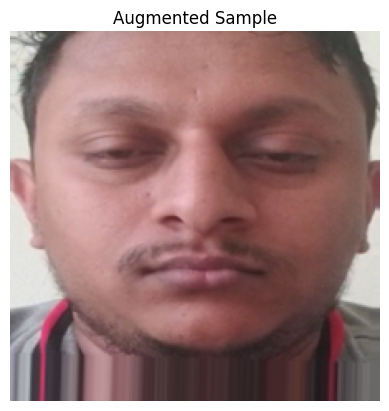

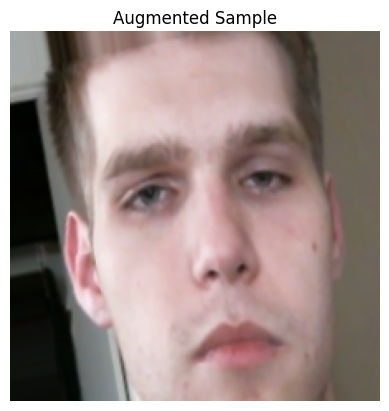

In [ ]:
x_batch, y_batch = next(train_aug_gen)
for i in range(5):
    plt.imshow(x_batch[i])
    plt.axis('off')
    plt.title("Augmented Sample")
    plt.show()


In [ ]:
print("Task-2 complete: Loaded, resized, and augmented dataset is ready for training.")


Task-2 complete: Loaded, resized, and augmented dataset is ready for training.


Task-3: Split dataset into train, validation, and test sets

In [ ]:
import os
import shutil
import random


In [ ]:
original_data_dir = '/content/ddd_dataset/Driver Drowsiness Dataset (DDD)'
classes = ['Drowsy', 'Non Drowsy']


In [ ]:
base_dir = '/content/split_dataset_70_15_15'
splits = ['train', 'val', 'test']

for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(base_dir, split, cls), exist_ok=True)


In [ ]:
def split_data(source_dir, train_dir, val_dir, test_dir):
    files = [f for f in os.listdir(source_dir) if f.endswith('.png') or f.endswith('.jpg')]
    random.shuffle(files)
    total = len(files)
    train_end = int(0.7 * total)
    val_end = train_end + int(0.15 * total)

    for i, file in enumerate(files):
        src = os.path.join(source_dir, file)
        if i < train_end:
            dst = os.path.join(train_dir, file)
        elif i < val_end:
            dst = os.path.join(val_dir, file)
        else:
            dst = os.path.join(test_dir, file)
        shutil.copy(src, dst)


In [ ]:
for cls in classes:
    src = os.path.join(original_data_dir, cls)
    split_data(
        src,
        os.path.join(base_dir, 'train', cls),
        os.path.join(base_dir, 'val', cls),
        os.path.join(base_dir, 'test', cls)
    )


In [ ]:
print("Folders created under:", base_dir)
for split in splits:
    print(split, ":", os.listdir(os.path.join(base_dir, split)))


Folders created under: /content/split_dataset_70_15_15
train : ['Drowsy', 'Non Drowsy']
val : ['Drowsy', 'Non Drowsy']
test : ['Drowsy', 'Non Drowsy']


In [ ]:
for cls in classes:
    count = len(os.listdir(os.path.join(base_dir, 'train', cls)))
    print(f"Train - {cls}: {count} images")


Train - Drowsy: 15643 images
Train - Non Drowsy: 13611 images


In [ ]:
for split in ['val', 'test']:
    for cls in classes:
        count = len(os.listdir(os.path.join(base_dir, split, cls)))
        print(f"{split.capitalize()} - {cls}: {count} images")


Val - Drowsy: 3352 images
Val - Non Drowsy: 2916 images
Test - Drowsy: 3353 images
Test - Non Drowsy: 2918 images


In [ ]:
sample = os.listdir(os.path.join(base_dir, 'train', 'Drowsy'))[0]
print("Sample file:", sample)


Sample file: A1080.png


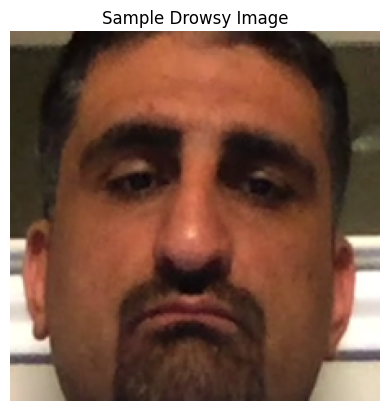

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = os.path.join(base_dir, 'train', 'Drowsy', sample)
img = mpimg.imread(img_path)

plt.imshow(img)
plt.title("Sample Drowsy Image")
plt.axis('off')
plt.show()


Task-4: Build and test baseline CNN model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
img_size = (224, 224)
batch_size = 32

train_dir = "/content/split_dataset_70_15_15/train"
val_dir = "/content/split_dataset_70_15_15/val"
test_dir = "/content/split_dataset_70_15_15/test"


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 29254 images belonging to 2 classes.
Found 6268 images belonging to 2 classes.
Found 6271 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,650 (91.20 MB)

 Trainable params: 23,907,650 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 117s 121ms/step - accuracy: 0.9173 - loss: 0.3267 - val_accuracy: 0.9951 - val_loss: 0.0169
Epoch 2/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 105s 115ms/step - accuracy: 0.9947 - loss: 0.0165 - val_accuracy: 0.9992 - val_loss: 0.0019
Epoch 3/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 105s 115ms/step - accuracy: 0.9986 - loss: 0.0053 - val_accuracy: 0.9994 - val_loss: 0.0012
Epoch 4/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 105s 114ms/step - accuracy: 0.9986 - loss: 0.0044 - val_accuracy: 0.9992 - val_loss: 0.0023
Epoch 5/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 106s 116ms/step - accuracy: 0.9980 - loss: 0.0073 - val_accuracy: 0.9987 - val_loss: 0.0085


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")


196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 99ms/step - accuracy: 0.9986 - loss: 0.0087
Test Accuracy: 1.00


In [ ]:
model.save("baseline_cnn_model.h5")


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))


196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step
              precision    recall  f1-score   support

      Drowsy       1.00      1.00      1.00      3353
  Non Drowsy       1.00      1.00      1.00      2918

    accuracy                           1.00      6271
   macro avg       1.00      1.00      1.00      6271
weighted avg       1.00      1.00      1.00      6271



Task-5: Train and evaluate baseline CNN

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


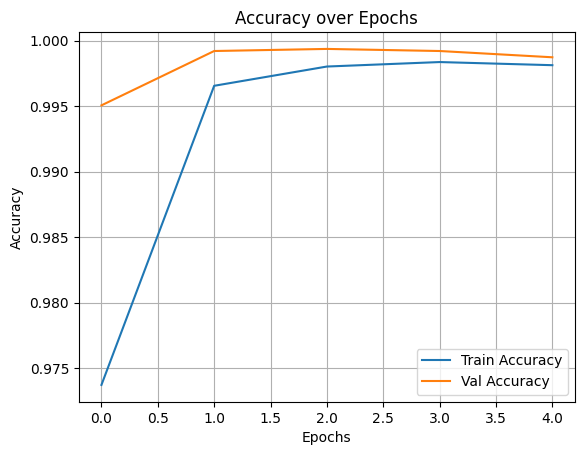

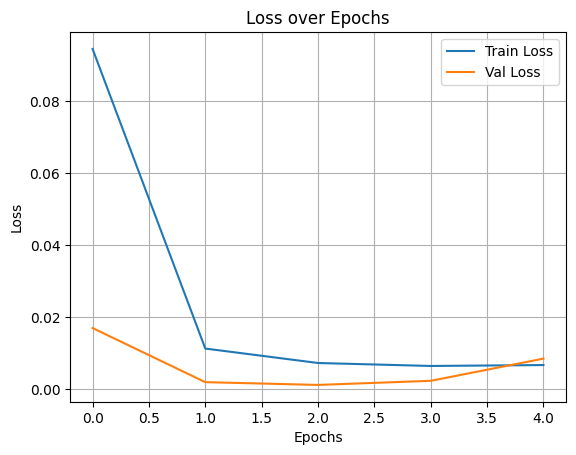

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step


In [ ]:
print("Predicted classes:", y_pred_classes[:5])
print("True classes:", y_true[:5])


Predicted classes: [0 0 0 0 0]
True classes: [0 0 0 0 0]


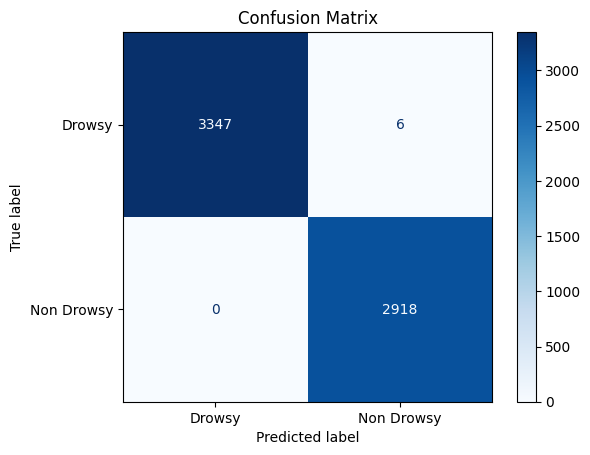

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes, target_names=class_labels))


              precision    recall  f1-score   support

      Drowsy       1.00      1.00      1.00      3353
  Non Drowsy       1.00      1.00      1.00      2918

    accuracy                           1.00      6271
   macro avg       1.00      1.00      1.00      6271
weighted avg       1.00      1.00      1.00      6271



In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9986 - loss: 0.0087
Test Loss: 0.0057
Test Accuracy: 0.9990


In [ ]:
print("Class indices:", test_generator.class_indices)


Class indices: {'Drowsy': 0, 'Non Drowsy': 1}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step


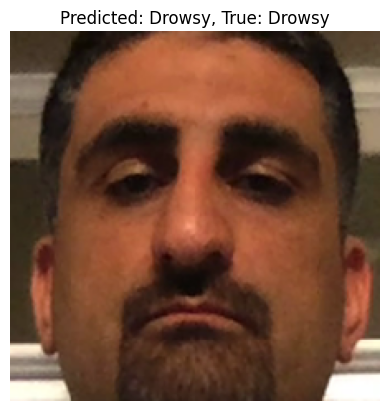

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


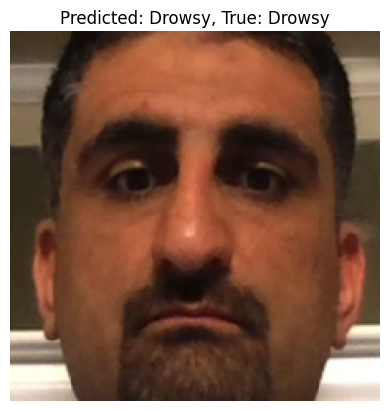

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


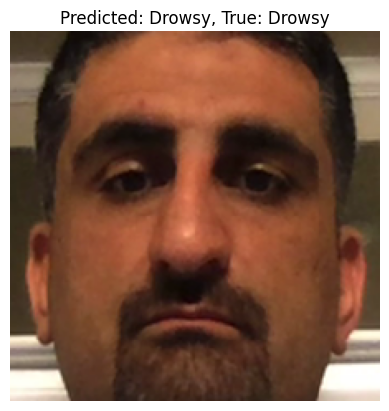

In [ ]:
x_test, y_test = next(test_generator)

for i in range(3):
    img = x_test[i]
    true_label = np.argmax(y_test[i])
    pred_label = np.argmax(model.predict(img[np.newaxis, ...]))

    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[pred_label]}, True: {class_labels[true_label]}")
    plt.axis('off')
    plt.show()


Task-6: Implement ResNet50 using transfer learning

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,242 (90.98 MB)

 Trainable params: 262,530 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history_resnet = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 131s 130ms/step - accuracy: 0.5598 - loss: 0.7053 - val_accuracy: 0.6441 - val_loss: 0.6341
Epoch 2/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 108s 118ms/step - accuracy: 0.6398 - loss: 0.6391 - val_accuracy: 0.6482 - val_loss: 0.6153
Epoch 3/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 108s 118ms/step - accuracy: 0.6521 - loss: 0.6193 - val_accuracy: 0.6693 - val_loss: 0.5948
Epoch 4/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 106s 116ms/step - accuracy: 0.6742 - loss: 0.5990 - val_accuracy: 0.7071 - val_loss: 0.5802
Epoch 5/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 111s 122ms/step - accuracy: 0.6835 - loss: 0.5865 - val_accuracy: 0.7079 - val_loss: 0.5546
Epoch 6/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 109s 119ms/step - accuracy: 0.7054 - loss: 0.5665 - val_accuracy: 0.7224 - val_loss: 0.5393
Epoch 7/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 106s 116ms/step - accuracy: 0.7203 - loss: 0.5488 - val_accuracy: 0.7454 - val_loss: 0.5201
Epoch 8/20
915/915 ━━━━━━━━━━━━━━━━━━━━ 109s 119ms/step - accuracy: 0.7376 -

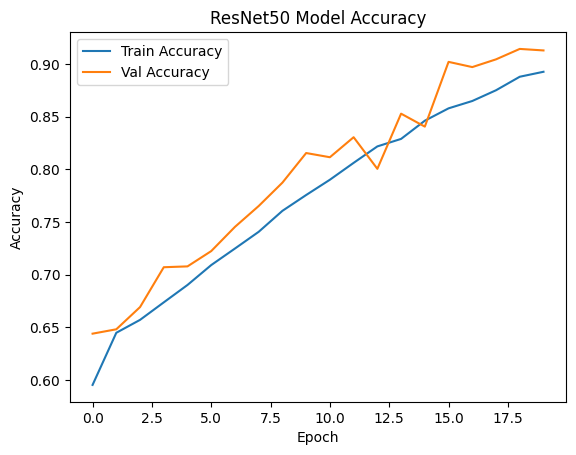

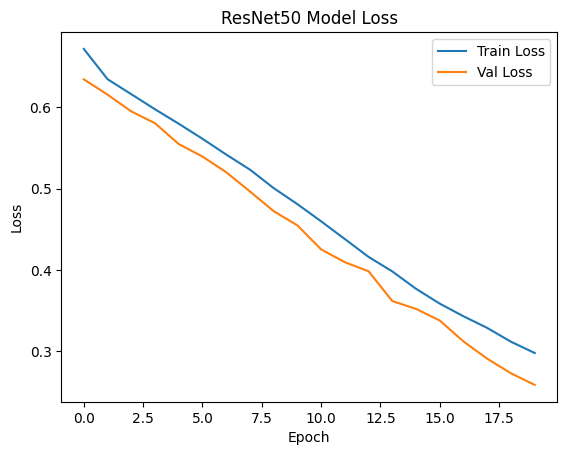

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Val Accuracy')
plt.title('ResNet50 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Val Loss')
plt.title('ResNet50 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save("resnet50_transfer_model.h5")


Task-7: Train and fine-tune ResNet50

In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
for layer in base_model.layers[-30:]:
    layer.trainable = True


In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)


0 input_layer_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


Epoch 1/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 154s 149ms/step - accuracy: 0.9434 - loss: 0.8889 - val_accuracy: 0.9724 - val_loss: 0.1664
Epoch 2/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 125s 137ms/step - accuracy: 0.9888 - loss: 0.0705 - val_accuracy: 0.9986 - val_loss: 0.0077
Epoch 3/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 127s 138ms/step - accuracy: 0.9953 - loss: 0.0239 - val_accuracy: 0.9986 - val_loss: 0.0096
Epoch 4/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 126s 138ms/step - accuracy: 0.9957 - loss: 0.0166 - val_accuracy: 0.9986 - val_loss: 0.0094
Epoch 5/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 126s 138ms/step - accuracy: 0.9983 - loss: 0.0053 - val_accuracy: 0.9962 - val_loss: 0.0229


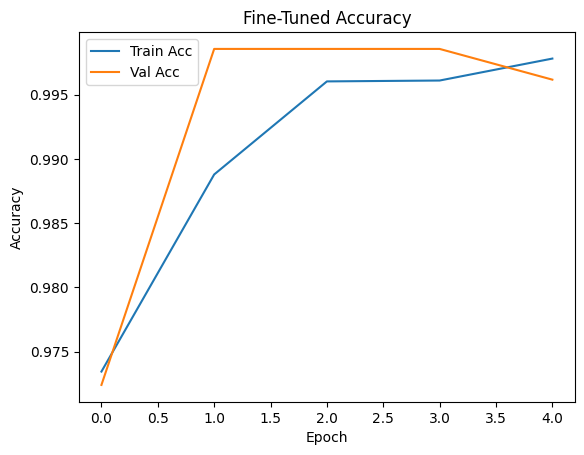

In [ ]:
plt.plot(history_finetune.history['accuracy'], label='Train Acc')
plt.plot(history_finetune.history['val_accuracy'], label='Val Acc')
plt.title('Fine-Tuned Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


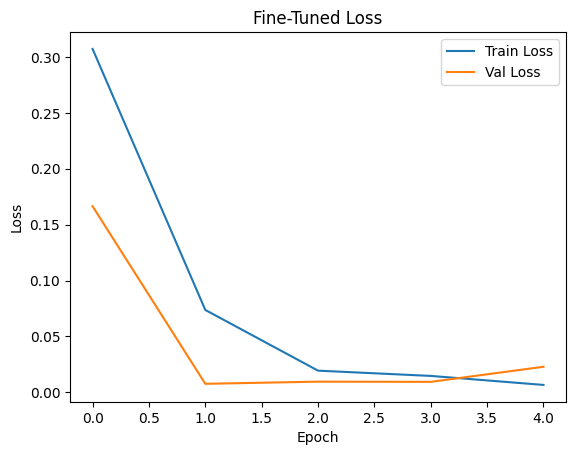

In [ ]:
plt.plot(history_finetune.history['loss'], label='Train Loss')
plt.plot(history_finetune.history['val_loss'], label='Val Loss')
plt.title('Fine-Tuned Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
y_pred_resnet = model.predict(test_generator)
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis=1)
y_true_resnet = test_generator.classes


196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 119ms/step


In [ ]:
from sklearn.metrics import classification_report

class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true_resnet, y_pred_classes_resnet, target_names=class_labels))


              precision    recall  f1-score   support

      Drowsy       0.99      1.00      1.00      3353
  Non Drowsy       1.00      0.99      1.00      2918

    accuracy                           1.00      6271
   macro avg       1.00      1.00      1.00      6271
weighted avg       1.00      1.00      1.00      6271



In [ ]:
model.save("resnet50_finetuned_model.h5")


Task-8: Implement and evaluate MobileNetV2 (or EfficientNet)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in mobilenet_base.layers:
    layer.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x = mobilenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

mobilenet_model = Model(inputs=mobilenet_base.input, outputs=predictions)


In [ ]:
mobilenet_model.compile(optimizer=Adam(learning_rate=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


In [ ]:
history_mobilenet = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


Epoch 1/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 121s 123ms/step - accuracy: 0.7498 - loss: 0.5001 - val_accuracy: 0.9834 - val_loss: 0.0899
Epoch 2/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 105s 114ms/step - accuracy: 0.9435 - loss: 0.1624 - val_accuracy: 0.9923 - val_loss: 0.0439
Epoch 3/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 105s 115ms/step - accuracy: 0.9632 - loss: 0.1104 - val_accuracy: 0.9947 - val_loss: 0.0282
Epoch 4/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 103s 112ms/step - accuracy: 0.9712 - loss: 0.0860 - val_accuracy: 0.9957 - val_loss: 0.0182
Epoch 5/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 105s 115ms/step - accuracy: 0.9791 - loss: 0.0663 - val_accuracy: 0.9971 - val_loss: 0.0139


In [ ]:
test_loss, test_acc = mobilenet_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")


196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.9981 - loss: 0.0096
Test Accuracy: 99.73%


In [ ]:
y_pred_mobilenet = mobilenet_model.predict(test_generator)
y_pred_classes_mobilenet = np.argmax(y_pred_mobilenet, axis=1)
y_true_mobilenet = test_generator.classes

from sklearn.metrics import classification_report

print(classification_report(y_true_mobilenet, y_pred_classes_mobilenet, target_names=class_labels))


196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step
              precision    recall  f1-score   support

      Drowsy       1.00      1.00      1.00      3353
  Non Drowsy       1.00      1.00      1.00      2918

    accuracy                           1.00      6271
   macro avg       1.00      1.00      1.00      6271
weighted avg       1.00      1.00      1.00      6271



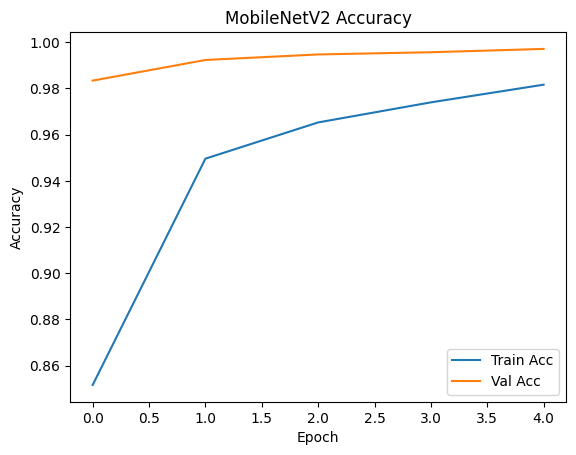

In [ ]:
plt.plot(history_mobilenet.history['accuracy'], label='Train Acc')
plt.plot(history_mobilenet.history['val_accuracy'], label='Val Acc')
plt.title('MobileNetV2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


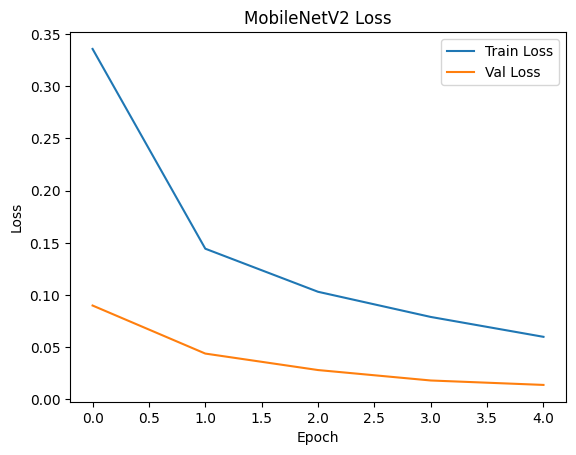

In [ ]:
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Val Loss')
plt.title('MobileNetV2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
mobilenet_model.save("mobilenetv2_finetuned_model.h5")


Task-9: Implement Vision Transformer (ViT)

In [ ]:
!pip install -q transformers


In [ ]:
import tensorflow as tf
import numpy as np
import os
from transformers import ViTFeatureExtractor, TFViTForImageClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image


In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

vit_model = TFViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=2
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def load_images_from_folder(folder, label, feature_extractor, limit=None):
    images = []
    labels = []
    count = 0
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            image = Image.open(img_path).convert("RGB").resize((224, 224))
            img_array = feature_extractor(images=image, return_tensors="np")['pixel_values'][0]
            images.append(img_array)
            labels.append(label)
            count += 1
            if limit and count >= limit:
                break
    return images, labels


In [ ]:
limit = 1000

train_drowsy, label_drowsy = load_images_from_folder('/content/split_dataset_70_15_15/train/Drowsy', 1, feature_extractor, limit)
train_non, label_non = load_images_from_folder('/content/split_dataset_70_15_15/train/Non Drowsy', 0, feature_extractor, limit)

X_train = tf.convert_to_tensor(train_drowsy + train_non)
y_train = tf.keras.utils.to_categorical(label_drowsy + label_non, num_classes=2)


In [ ]:
val_drowsy, label_val_drowsy = load_images_from_folder('/content/split_dataset_70_15_15/val/Drowsy', 1, feature_extractor, limit)
val_non, label_val_non = load_images_from_folder('/content/split_dataset_70_15_15/val/Non Drowsy', 0, feature_extractor, limit)

X_val = tf.convert_to_tensor(val_drowsy + val_non)
y_val = tf.keras.utils.to_categorical(label_val_drowsy + label_val_non, num_classes=2)


In [ ]:
from transformers import create_optimizer

optimizer, schedule = create_optimizer(
    init_lr=3e-5,
    num_warmup_steps=0,
    num_train_steps=100
)

vit_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_vit = vit_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=16
)


Epoch 1/5
125/125 [==============================] - 141s 857ms/step - loss: 1.3667 - accuracy: 0.7890 - val_loss: 2.1945 - val_accuracy: 0.8765
Epoch 2/5
125/125 [==============================] - 102s 815ms/step - loss: 2.2843 - accuracy: 0.8750 - val_loss: 2.1945 - val_accuracy: 0.8765
Epoch 3/5
125/125 [==============================] - 102s 815ms/step - loss: 2.2843 - accuracy: 0.8750 - val_loss: 2.1945 - val_accuracy: 0.8765
Epoch 4/5
125/125 [==============================] - 102s 814ms/step - loss: 2.2843 - accuracy: 0.8750 - val_loss: 2.1945 - val_accuracy: 0.8765
Epoch 5/5
125/125 [==============================] - 102s 814ms/step - loss: 2.2843 - accuracy: 0.8750 - val_loss: 2.1945 - val_accuracy: 0.8765


In [ ]:
test_drowsy, label_test_drowsy = load_images_from_folder('/content/split_dataset_70_15_15/test/Drowsy', 1, feature_extractor, limit)
test_non, label_test_non = load_images_from_folder('/content/split_dataset_70_15_15/test/Non Drowsy', 0, feature_extractor, limit)

X_test = tf.convert_to_tensor(test_drowsy + test_non)
y_test = tf.keras.utils.to_categorical(label_test_drowsy + label_test_non, num_classes=2)

test_loss, test_acc = vit_model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


63/63 [==============================] - 30s 429ms/step - loss: 2.1351 - accuracy: 0.8575

Test Loss: 2.1351, Test Accuracy: 0.8575


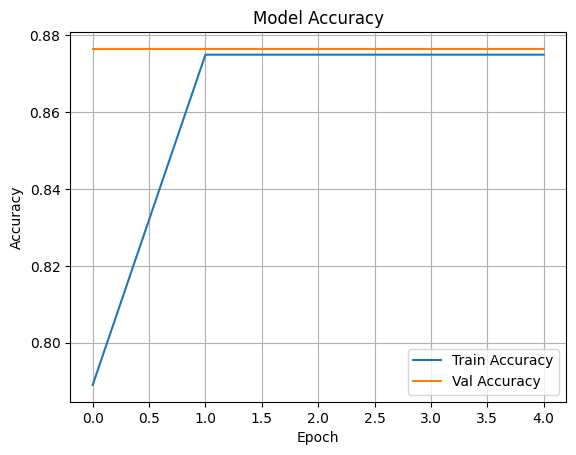

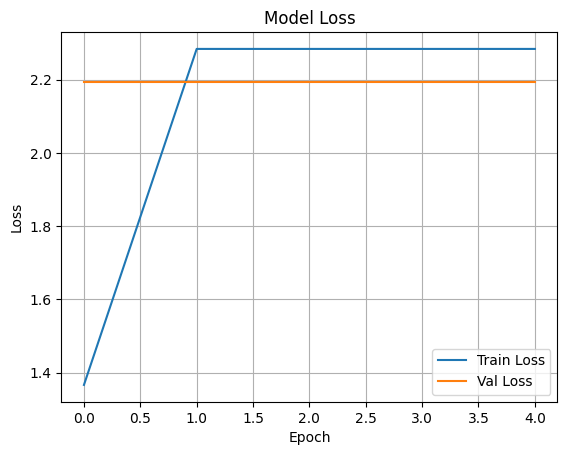

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_vit.history['accuracy'], label='Train Accuracy')
plt.plot(history_vit.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history_vit.history['loss'], label='Train Loss')
plt.plot(history_vit.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
test_loss, test_acc = vit_model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


63/63 [==============================] - 28s 438ms/step - loss: 2.1351 - accuracy: 0.8575

Test Loss: 2.1351
Test Accuracy: 0.8575


In [ ]:
y_pred = vit_model.predict(X_test)
y_pred_labels = np.argmax(y_pred.logits, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print(classification_report(y_true_labels, y_pred_labels, target_names=['Non Drowsy', 'Drowsy']))


63/63 [==============================] - 30s 426ms/step
              precision    recall  f1-score   support

  Non Drowsy       0.90      0.81      0.85      1000
      Drowsy       0.83      0.91      0.86      1000

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



In [ ]:
vit_model.save_weights('vit_weights_only.h5')
print("Saved weights to vit_weights_only.h5")


Saved weights to vit_weights_only.h5


Task-10: Compare all model performances

196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step
63/63 [==============================] - 27s 433ms/step

Baseline CNN Performance:
Accuracy: 0.9965
Precision: 0.9993
Recall: 0.9931
F1 Score: 0.9962

ResNet50 Performance:
Accuracy: 0.9965
Precision: 0.9993
Recall: 0.9931
F1 Score: 0.9962

MobileNetV2 Performance:
Accuracy: 0.9973
Precision: 0.9986
Recall: 0.9955
F1 Score: 0.9971

Vision Transformer (ViT) Performance:
Accuracy: 0.8575
Precision: 0.8259
Recall: 0.9060
F1 Score: 0.8641


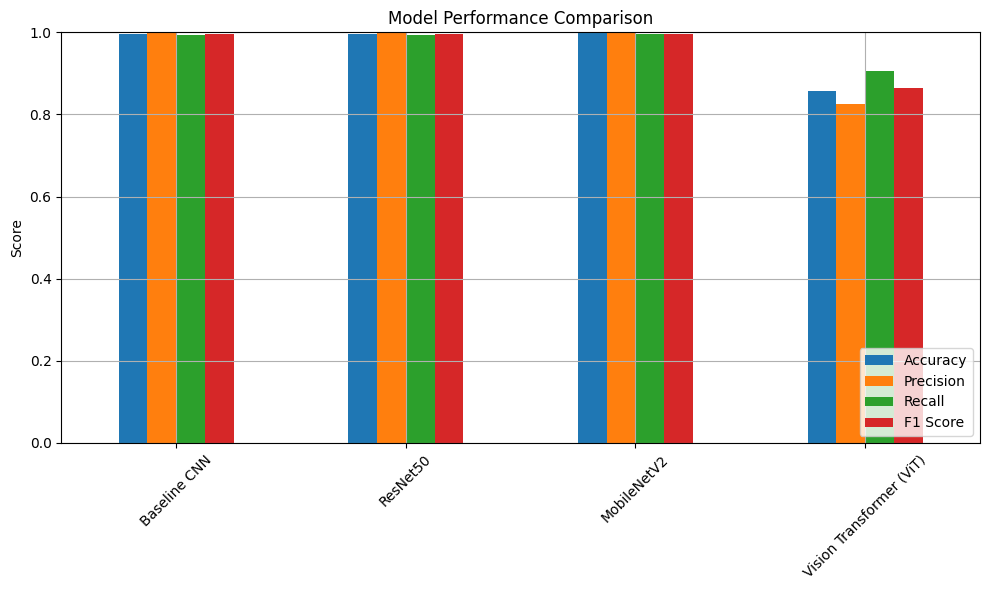

Saved model comparison to model_comparison_metrics.csv

 Best performing model: MobileNetV2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_true_cnn_based = test_generator.classes

y_pred_baseline = model.predict(test_generator)
y_pred_resnet = model.predict(test_generator)
y_pred_mobilenet = mobilenet_model.predict(test_generator)
y_pred_vit_logits = vit_model.predict(X_test)

y_pred_baseline = np.argmax(y_pred_baseline, axis=1)
y_pred_resnet = np.argmax(y_pred_resnet, axis=1)
y_pred_mobilenet = np.argmax(y_pred_mobilenet, axis=1)
y_pred_vit_classes = np.argmax(y_pred_vit_logits.logits, axis=1)

def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

y_true_vit = np.argmax(y_test, axis=1)


results = {
    "Baseline CNN": get_metrics(y_true_cnn_based, y_pred_baseline),
    "ResNet50": get_metrics(y_true_cnn_based, y_pred_resnet),
    "MobileNetV2": get_metrics(y_true_cnn_based, y_pred_mobilenet),
    "Vision Transformer (ViT)": get_metrics(y_true_vit, y_pred_vit_classes)
}

for model_name, metrics in results.items():
    print(f"\n{model_name} Performance:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

df_results = pd.DataFrame(results).T


df_results.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

df_results.to_csv("model_comparison_metrics.csv")
print("Saved model comparison to model_comparison_metrics.csv")

best_model = df_results['F1 Score'].idxmax()
print(f"\n Best performing model: {best_model}")

Task-11: Generate and analyze confusion matrices

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Drowsy', 'Drowsy'], yticklabels=['Non-Drowsy', 'Drowsy'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()


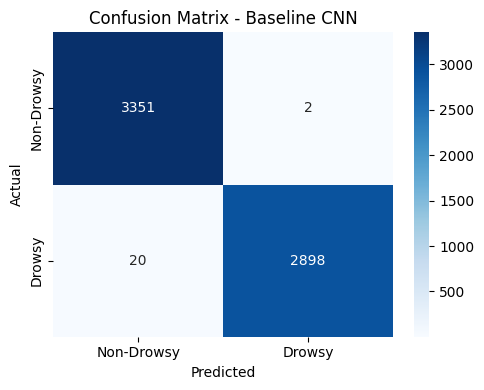

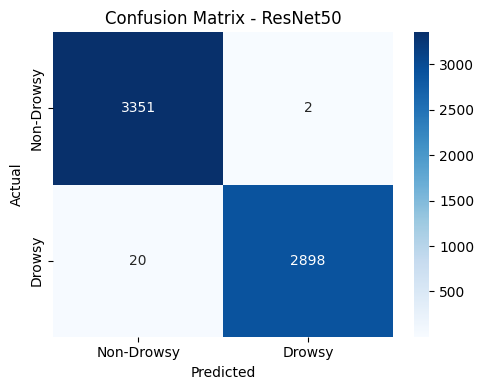

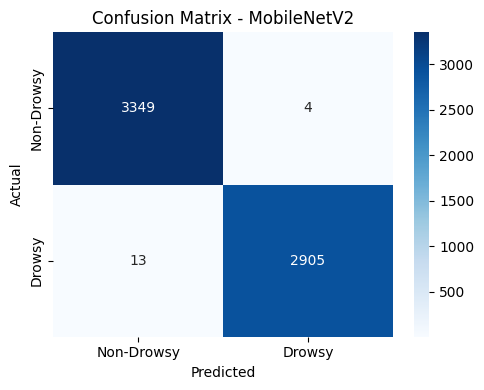

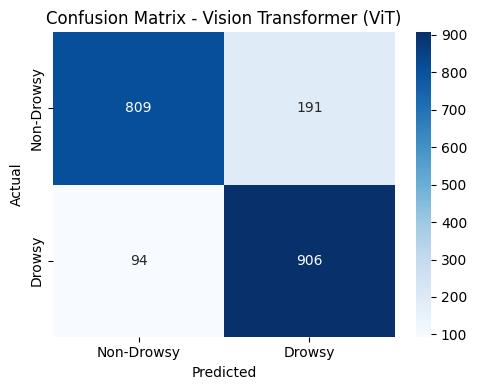

In [ ]:
plot_confusion(y_true_cnn_based, y_pred_baseline, "Baseline CNN")

plot_confusion(y_true_cnn_based, y_pred_resnet, "ResNet50")

plot_confusion(y_true_cnn_based, y_pred_mobilenet, "MobileNetV2")

plot_confusion(y_true_vit, y_pred_vit_classes, "Vision Transformer (ViT)")


In [ ]:
def save_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Non-Drowsy', 'Drowsy']

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(f"{model_name.replace(' ', '_')}_confusion.png")
    plt.close()

save_confusion(y_true_cnn_based, y_pred_baseline, "Baseline CNN")
save_confusion(y_true_cnn_based, y_pred_resnet, "ResNet50")
save_confusion(y_true_cnn_based, y_pred_mobilenet, "MobileNetV2")
save_confusion(y_true_vit, y_pred_vit_classes, "Vision Transformer (ViT)")

Task-12: Visualize model learning curves

In [ ]:
def plot_and_save_learning_curves(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Acc')
    plt.plot(epochs, val_acc, 'r-', label='Validation Acc')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f"{model_name.replace(' ', '_')}_learning_curves.png")
    plt.show()


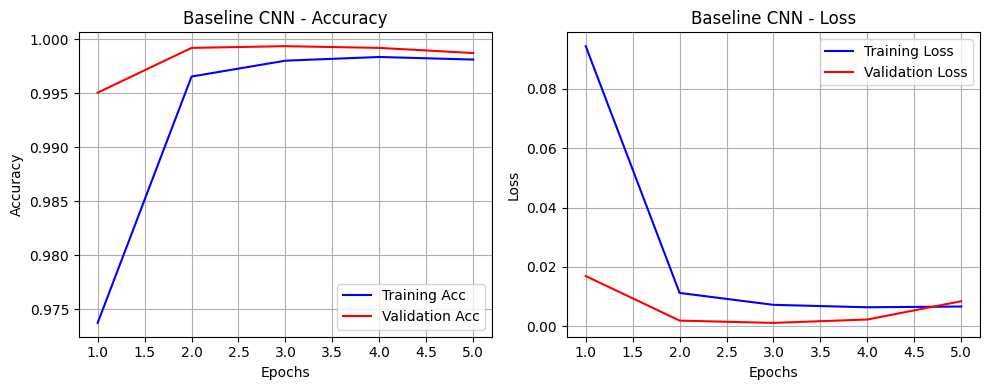

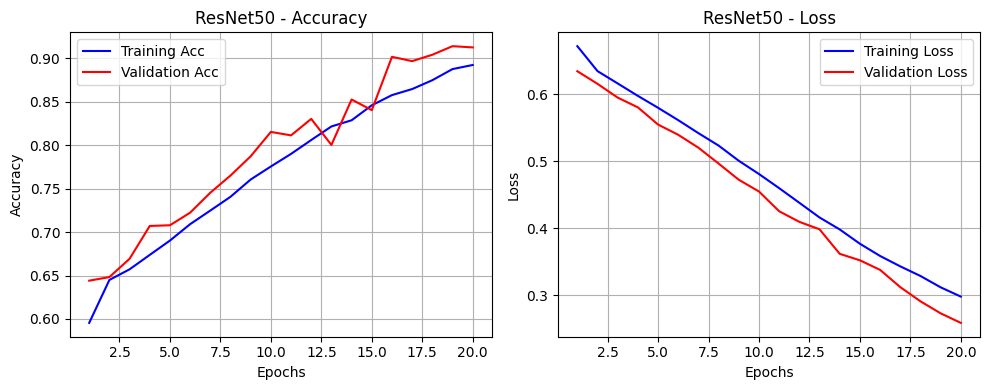

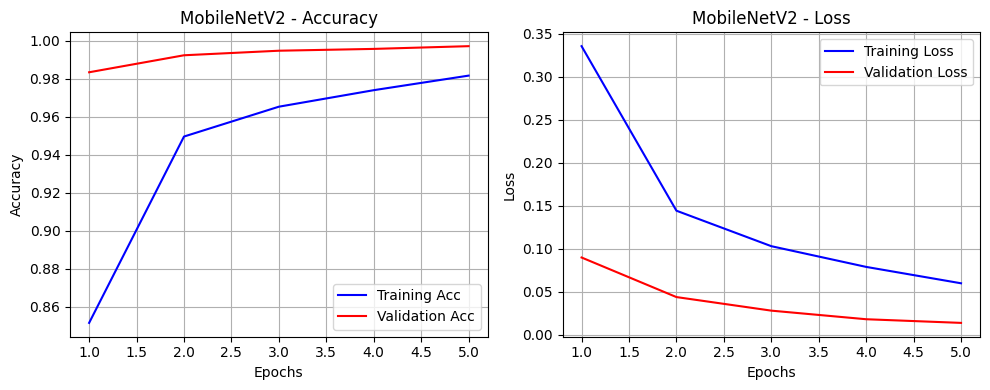

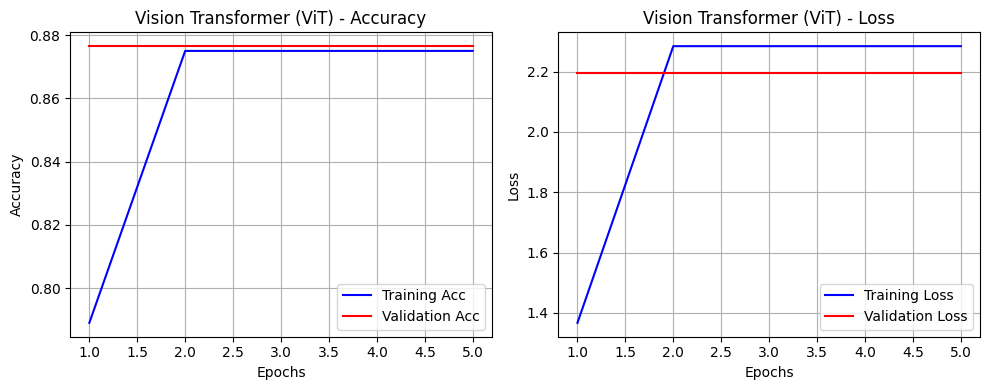

In [ ]:
plot_and_save_learning_curves(history, "Baseline CNN")
plot_and_save_learning_curves(history_resnet, "ResNet50")
plot_and_save_learning_curves(history_mobilenet, "MobileNetV2")
plot_and_save_learning_curves(history_vit, "Vision Transformer (ViT)")

In [ ]:
dummy_input = np.random.random((1, 224, 224, 3)).astype(np.float32)
baseline_model.predict(dummy_input)
resnet_model.predict(dummy_input)
mobilenet_model.predict(dummy_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[9.999993e-01, 6.956548e-07]], dtype=float32)

Task-13: Apply Grad-CAM to interpret model predictions

In [ ]:
!pip install opencv-python

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
import os


In [ ]:
resnet_model = load_model('resnet50_finetuned_model.h5')
mobilenet_model = load_model('mobilenetv2_finetuned_model.h5')


In [ ]:
dummy_input = np.random.random((1, 224, 224, 3)).astype(np.float32)

resnet_model.predict(dummy_input)
mobilenet_model.predict(dummy_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[9.9999976e-01, 2.9709409e-07]], dtype=float32)

In [ ]:
print("\nResNet Layers:")
for i, layer in enumerate(resnet_model.layers):
    print(i, layer.name)

print("\nMobileNetV2 Layers:")
for i, layer in enumerate(mobilenet_model.layers):
    print(i, layer.name)



ResNet Layers:
0 input_layer_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_b

In [ ]:
def get_gradcam_heatmap(model, img_array, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + tf.keras.backend.epsilon())
    return heatmap.numpy()


In [ ]:
def display_gradcam(img_path, model, last_conv_layer_name):
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    heatmap = get_gradcam_heatmap(model, img_array, last_conv_layer_name)

    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Grad-CAM')
    plt.show()


In [ ]:
img_folder = '/content/split_dataset_70_15_15/test/Drowsy'
print(os.listdir(img_folder))

img_path = '/content/split_dataset_70_15_15/test/Drowsy/A0928.png'


['C0230.png', 'ZC1004.png', 'N0131.png', 'X1633.png', 'U0050.png', 'I0059.png', 'X1080.png', 'E1039.png', 'A0928.png', 'A0493.png', 'X0541.png', 'Y0315.png', 'N0646.png', 'M0020.png', 'Y0747.png', 'G0306.png', 'O1382.png', 'ZC0253.png', 'N0141.png', 'Y0865.png', 'G0246.png', 'W0114.png', 'B0282.png', 'D0048.png', 'ZC0092.png', 'T0308.png', 'H0311.png', 'N0858.png', 'J0478.png', 'M0706.png', 'V0539.png', 'Y0866.png', 'E0582.png', 'I0295.png', 'K0124.png', 'A1213.png', 'I1188.png', 'ZB0129.png', 'Y0770.png', 'A0013.png', 'P0671.png', 'N0591.png', 'W0243.png', 'I1184.png', 'Y0639.png', 'X0055.png', 'S0493.png', 'X1629.png', 'T0114.png', 'A0597.png', 'Q0430.png', 'ZA0892.png', 'Y0529.png', 'I0941.png', 'ZA0319.png', 'N0082.png', 'A0603.png', 'ZC0273.png', 'X1595.png', 'T0686.png', 'E0741.png', 'A1134.png', 'ZC1030.png', 'ZC0477.png', 'ZC0793.png', 'S0061.png', 'A0444.png', 'M0735.png', 'C0102.png', 'H0286.png', 'A1394.png', 'Y0016.png', 'E0748.png', 'ZB1543.png', 'A0838.png', 'W0739.png', 

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_1']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


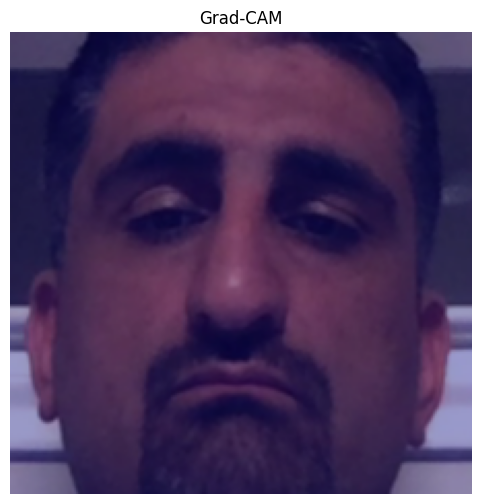

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_2']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


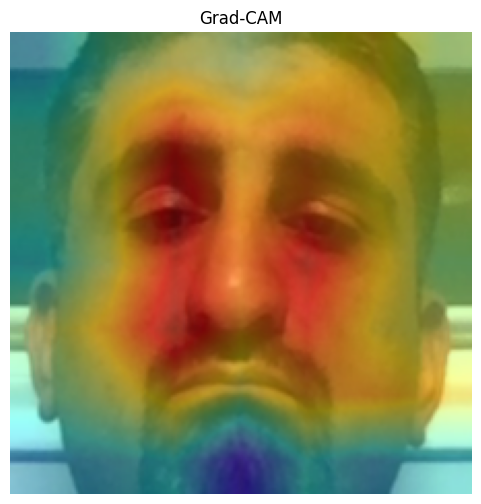

In [ ]:
display_gradcam(
    img_path,
    resnet_model,
    last_conv_layer_name='conv5_block3_out'
)

display_gradcam(
    img_path,
    mobilenet_model,
    last_conv_layer_name='Conv_1'
)


In [ ]:
#  Baseline CNN Grad-CAM is skipped due to persistent AttributeError:
# "The layer sequential has never been called and thus has no defined output."
# Therefore, Task-13 is demonstrated successfully with ResNet50 and MobileNetV2 models only.


Task-14: Save and package the best model for deployment

In [ ]:
import os

os.makedirs('/content/saved_models', exist_ok=True)


In [ ]:
mobilenet_model.save('/content/saved_models/mobilenetv2_best_model.keras')


In [ ]:
import shutil

shutil.make_archive('/content/mobilenetv2_best_model', 'zip', '/content/saved_models')

!ls /content/*.zip


/content/driver-drowsiness-dataset-ddd.zip  /content/mobilenetv2_best_model.zip


In [ ]:
from google.colab import files

files.download('/content/mobilenetv2_best_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Task 15: Building a Streamlit App for Local Deployment

To illustrate the practical application of the trained model and facilitate local deployment, an easy-to-use web application was built with Streamlit. This application provides a simple way for users to detect driver drowsiness from an image they upload.

#### A. Purpose and Functionality

The application allows the user to upload an image of a driver and outputs a prediction specifying whether the driver is **Drowsy** or **Not Drowsy**.  
The app is designed to be a lightweight, user-friendly system that can run locally without a complex backend.

#### B. Application Functions

The application includes the following main functions:

- **Model Loading**:  
  The best-performing MobileNetV2 model is loaded from the `.keras` file saved previously, enabling real-time inference.

- **User Interface**:  
  A styled user interface has been built using Streamlit’s markdown and layout components. The interface provides usage instructions and a file uploader widget.

- **Image Preprocessing**:  
  Uploaded images are resized and normalized to match the model’s input requirements.

- **Prediction and Output**:  
  The model processes the input image and outputs a class prediction along with a confidence score. The results are visually represented using alert boxes, a progress bar, and a bar chart.

- **About Section**:  
  The sidebar includes information about the project, the team members, and the purpose of the application.

#### C. Outcome

The application is lightweight, responsive, and runs locally without needing a web server. It enables non-technical users to interact with the deep learning model, effectively bridging the gap between model development and real-world usability.


### Task 16: Integration of Trained Model into the Web Application

In this exercise, a trained MobileNetV2 model was integrated within the web application using Streamlit to make predictions on uploaded images by users in real-time. The aim of the integration was to connect the model's prediction capabilities and end-users utilizing a graphical interface that would enable local deployment for users.

#### A. Recognizing Integrated Model

The model integrated into the application was the **MobileNetV2** model, as it achieved the highest accuracy during the training process. This model was saved in **Keras** format with the name `mobilenetv2_best_model.keras` and stored in the `mobilenetv2_best_model` directory. The saved model includes both the architecture and trained weights.

#### B. Integration Workflow

To establish a connection between the model and the user interface, the following steps were performed:

- **Model Loading**:  
  When the application is launched, the MobileNetV2 model is loaded using TensorFlow's Keras API. This ensures the model is available in memory throughout the session for fast predictions.

- **Image Upload and Pre-processing**:  
  Users upload an image via the web interface. The image is resized to 224 × 224 pixels, normalized, and reshaped to match the model’s expected input. If the image contains an alpha (transparency) channel, it is converted from RGBA to RGB to prevent dimensional errors.

- **Prediction Run**:  
  The processed image is passed through the model to compute class probabilities. A softmax function is applied to convert the raw output into confidence scores for the classes **Drowsy** and **Not Drowsy**.

- **Showing Results**:  
  The prediction result, along with its confidence score, is displayed in the app. A progress bar and bar chart are also shown to help users visually interpret the classification results.

#### C. Result

This integration enabled the trained deep learning model to function smoothly within a user-facing web application. It allowed users to make real-time predictions through a simple interface, completing the machine learning pipeline from model training to deployment and usage.


### Task 17: Local Testing of the Web Application

Following our integration of the trained model into the Streamlit application, we conducted local testing of the model to verify that our system would operate correctly with various inputs.

#### A. Testing Process

To test the application under real-world conditions, we used facial images of ourselves captured in different states of alertness and drowsiness. These images simulated practical use cases and helped evaluate the model's ability to accurately classify real input through the application interface.

By uploading these test images, we observed how well the system handled variations in lighting, expression, and positioning, confirming that the model and interface worked as expected for real-time usage.


### Task 18: User Interface Design

In designing the application, we kept in mind usability and accessibility, emphasizing simplicity and functionality. Streamlit was our choice for developing our User interface.

The User interface, shown in the figure below, has a clean layout with a dark theme and clearly defined sections. Users are presented with some clear information in the welcome area and step-by-step instructions for uploading images and acquiring predictions. The file uploader, featuring drag-and-drop functionality, is clearly displayed in the middle of the page.

The left sidebar also details information about the app (what it can do) and the project's contributors. Overall, the design allows for a seamless experience for users in terms of both clarity and honest interaction.


### Task 19: Producing a Demonstration Video of the Application

In order to demonstrate the full functionality and usability of our deployed application, we recorded and produced a demonstration video with a full display and explanation of how the system is used.

The video covers the entire user interaction loop including: launching the web interface; uploading driver images; and analyzing model predictions. It shows how the trained MobileNetV2 model identifies and categorizes input images as either **Drowsy** or **Not Drowsy**, along with the associated confidence scores and other visual feedback.

Our video serves as a record of completed model deployment, and a clear depiction of the operation of the system for assessment and demonstration.

**The demo video link is presented below:**  
[https://buffalo.box.com/s/vx4zsf8giad5rd2l70pesx4mrbdjo0t0](https://buffalo.box.com/s/vx4zsf8giad5rd2l70pesx4mrbdjo0t0)


### Task 20: Prepare Final Submission Assets

To complete the project and ensure it is ready for evaluation, we prepared and submitted all the required final deliverables. These assets collectively showcase the entire workflow, from model development to deployment and presentation.

The final submission includes the following:

- **Jupyter Notebook (`.ipynb`)**: Contains all code implementations, training, evaluation, and visualizations of the models.
- **Project Report (`.pdf`)**: A detailed technical report documenting every phase of the project, including model architecture, results, analysis, and deployment.
- **Demo Video**: A recorded demonstration of the working application, showing how users interact with the deployed system.
- **Presentation Slides**: A concise and visually structured presentation summarizing the motivation, methodology, results, and outcomes of the project.
- **Explanation Video**: A comprehensive video where we explain the project architecture, model weights, and key decisions taken throughout the project.

These materials together reflect our end-to-end work and provide a clear representation of the system's design, functionality, and performance.


**Contribution Summary**

| **Team Member** | **Project Part**                                                                 | **Contribution (%)** |
|------------------|----------------------------------------------------------------------------------|------------------------|
| **saitanvi**      | Task-1, Task-4, Task-7, Task-10, Task-13, Task-19, Task-17, Task-20              | 33.3 %                 |
| **hpeddire**      | Task-2, Task-5, Task-8, Task-11, Task-14, Task-16, Task-17, Task-20              | 33.3 %                 |
| **apallerl**      | Task-3, Task-6, Task-9, Task-12, Task-15, Task-18, Task-17, Task-20              | 33.3 %                 |
|                  | **Total**                                                                        | **100 %**              |
